In [72]:
#importing liabriries 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [73]:
#reading the data
df = pd.read_csv(r"C:\Users\hala mohamed\Downloads\fifa_eda_stats.csv")

In [74]:
#knowing shape of data
df.shape

(18207, 57)

In [75]:
#basic explortaion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [76]:
#see sample of the data
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [77]:
#know columns which have null values 
df.isnull().sum()
#conclusion:club,joined,loaned from,contract valid until,release clause columns miss alot of data

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [78]:
#cleaning data
#filling the missing values for the continous variables for proper data visualization
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
 

# drop unuseful columns
columns_to_drop = ['Loaned From', 'Jersey Number']   
df = df.drop(columns=columns_to_drop)


In [79]:
#know which columns are catgorical and which are countionus
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['ID', 'Age', 'Overall', 'Potential', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')
Categorical Columns: Index(['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Position', 'Joined', 'Contract Valid Until',
       'Height', 'Weight', 'Release Clause'],
      dtype='object')


In [80]:
#we need to convert height and weight to numerical values, to be fill with mean
# Strip the "lbs" suffix and convert to an integer
def convert_weight(x):
    if isinstance(x, str):  # Ensure x is a string
        if x[-3:] == "lbs":
            return round(float(x[:-3]) * 0.453592, 2)
        elif x[-2:] == "kg":
            return float(x[:-2])
    return x  # Return original value if not a string

df['Weight'] = df['Weight'].apply(convert_weight)

def convert_height_to_inches(height_str):
    """Converts height in feet and inches format to inches (integer)."""
    if isinstance(height_str, str):
        feet, inches = height_str.split("'")
        total_inches = int(feet) * 12 + int(inches)
        return total_inches
    else:
        return height_str  


# Apply the function to the Height column
df['Height'] = df['Height'].apply(convert_height_to_inches)
 

 

 

In [81]:
# Fill missing numerical values with the mean of their respective columns
df.fillna(df.mean(), inplace=True)



C:\Users\hala mohamed\AppData\Local\Temp\ipykernel_21624\1682680654.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [82]:
#check the validity of the step
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                     48
Body Type                     48
Position                      60
Joined                      1553
Contract Valid Until         289
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallControl                    0
Accelerati

In [83]:
#fill the categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)

In [84]:
#verify the previous step
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

In [85]:
#Here , we have Finished the Data Cleaning phase

In [86]:
#here i made some functions that are intended to calculate different aggregate scores
#for players based on various attributes in the FIFA dataset, they will be useful for further exploration
def defending(data):
    '''Purpose: Calculates an overall "defending" score for a player.
       Attributes Considered: Marking, StandingTackle, SlidingTackle
       Calculation:
               First, it calculates the mean of Marking, StandingTackle, and SlidingTackle.
               Then, it takes the mean of the resulting average.
               Finally, it rounds this average and converts it to an integer'''
    
    return int(round(data[['Marking', 'StandingTackle', 'SlidingTackle']].mean().mean()))
def general(data):
    '''Purpose: Computes a "general" skills score.
       Attributes Considered: HeadingAccuracy, Dribbling, Curve, BallControl'''
    
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()).mean()))

def mental(data):
    '''Purpose: Computes a "mental" abilities score.
        Attributes Considered: Aggression, Interceptions, Positioning, Vision, Composure'''
    
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Composure']].mean()).mean()))

def passing(data):
    '''Purpose: Calculates a "passing" skills score.
       Attributes Considered: Crossing, ShortPassing, LongPassing'''
    
    return int(round((data[['Crossing', 'ShortPassing', 'LongPassing']].mean()).mean()))

def mobility(data):
    '''Purpose: Calculates a "mobility" score.
      Attributes Considered: Acceleration, SprintSpeed, Agility, Reactions'''
    
    return int(round((data[['Acceleration', 'SprintSpeed', 'Agility', 'Reactions']].mean()).mean()))

def power(data):
    '''Purpose: Computes a "power" score.
       Attributes Considered: Balance, Jumping, Stamina, Strength'''
    return int(round((data[['Balance', 'Jumping', 'Stamina', 'Strength']].mean()).mean()))

def rating(data):
    '''Purpose: Calculates a combined "rating" score based on overall and potential ratings.
       Attributes Considered: Potential, Overall'''
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    '''Purpose: Computes a "shooting" skills score.
       Attributes Considered: Finishing, Volleys, FKAccuracy, ShotPower, LongShots, Penalties'''
    
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower', 'LongShots', 'Penalties']].mean()).mean()))

In [87]:
#Adding these to data
df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [88]:
#we can create a data frame containing the important information  that may help for the analysis
players = df[['Name', 'Defending', 'General', 'Mental', 'Passing', 
                'Mobility', 'Power', 'Rating', 'Shooting', 'Age',
                'Nationality',  'Club']]
players

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Age,Nationality,Club
0,L. Messi,29,89,71,87,91,74,94,88,31,Argentina,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,33,Portugal,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,26,Brazil,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,27,Spain,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,27,Belgium,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,45,39,46,43,55,54,56,37,19,England,Crewe Alexandra
18203,N. Christoffersson,19,41,37,30,40,52,55,39,19,Sweden,Trelleborgs FF
18204,B. Worman,19,43,36,30,59,51,57,42,16,England,Cambridge United
18205,D. Walker-Rice,24,44,38,39,48,50,56,45,17,England,Tranmere Rovers


In [89]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power',
       'Rating', 'Shooting'],
      dtype='object')

In [90]:
#After finishing the data cleaning phase and making extra step ti facilitate the analysis , i started the univarinet analysis 
#for some important features

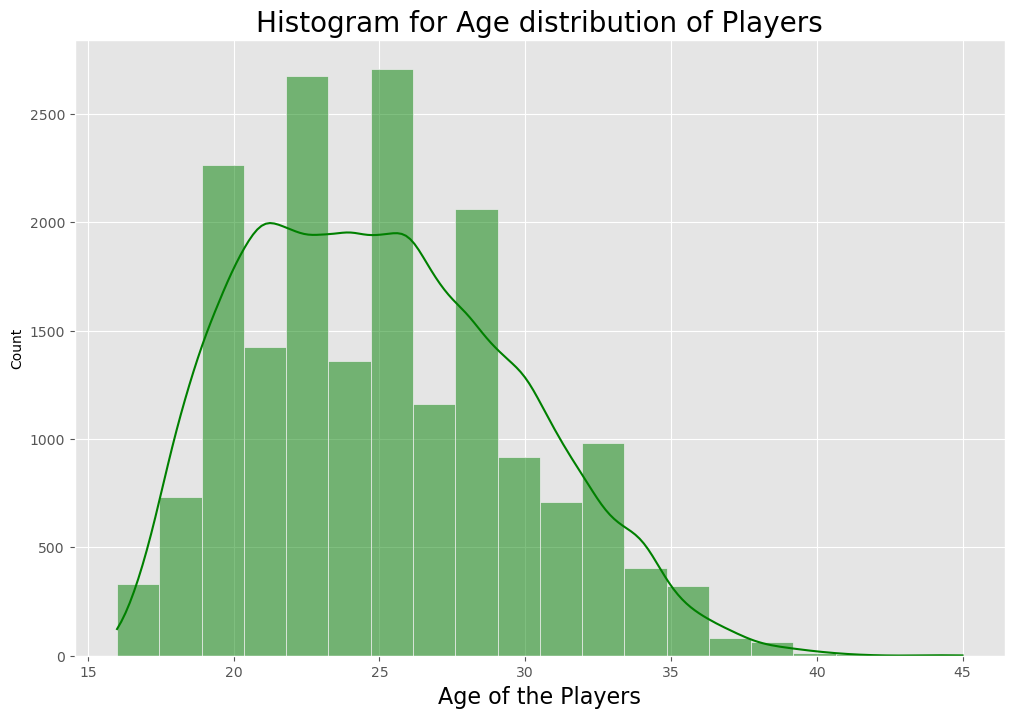

In [91]:
x = df['Age']
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
ax = sb.histplot(x, bins = 20, kde = True, color='g')
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 16)
ax.set_title(label = 'Histogram for Age distribution of Players', fontsize = 20)
plt.show()


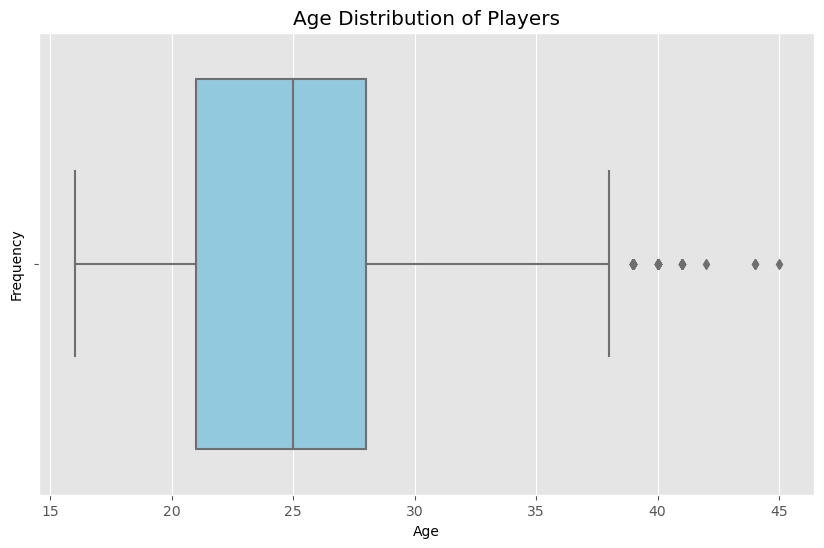

In [92]:
# to spot the outlires in Age ,we need to view the boxplot
plt.figure(figsize=(10, 6))   
sb.boxplot(x=df['Age'], color='skyblue')

 
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')

 
plt.show()

In [93]:
#as you saw ,we spot some outlires that need to be removed
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

 
df = remove_outliers_iqr(df, 'Age')

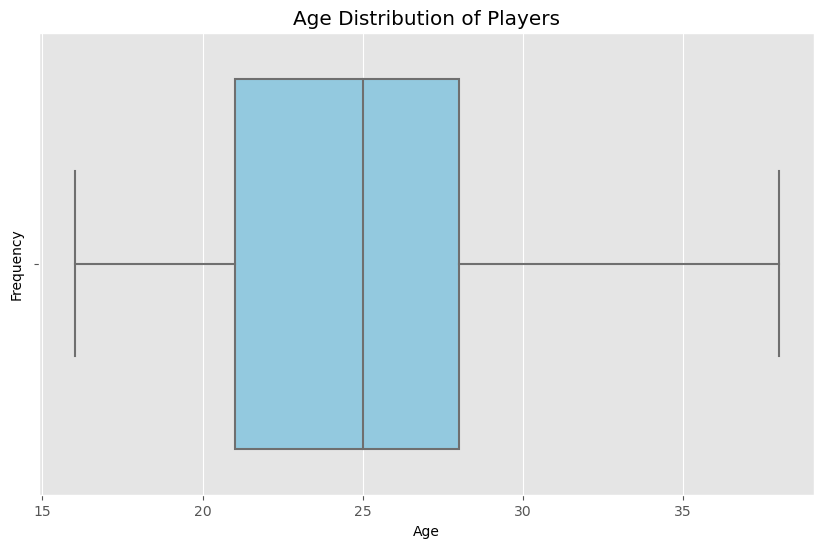

In [94]:
#to verify the step:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sb.boxplot(x=df['Age'], color='skyblue')

# Add titles and labels
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

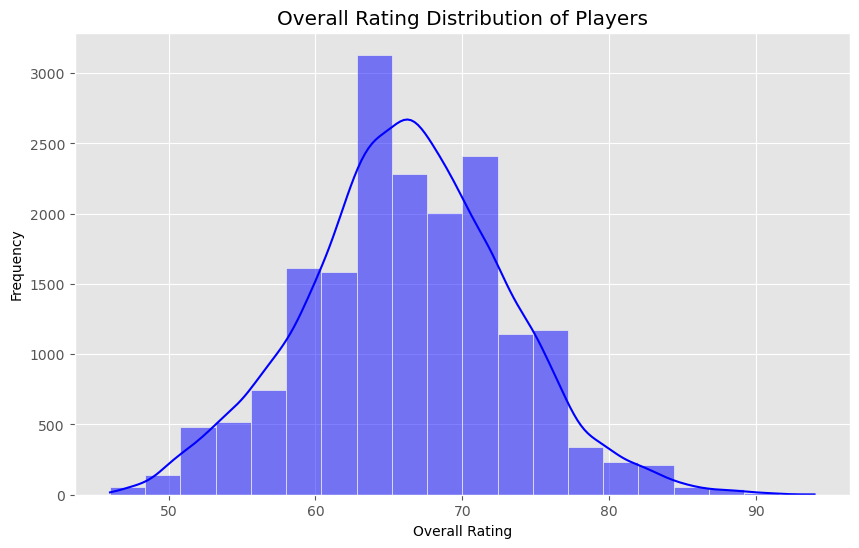

In [95]:
plt.figure(figsize=(10, 6))   
sb.histplot(df['Overall'], kde=True, bins=20, color='blue')

 
plt.title('Overall Rating Distribution of Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Text(0.5, 0, 'Overall Rating')

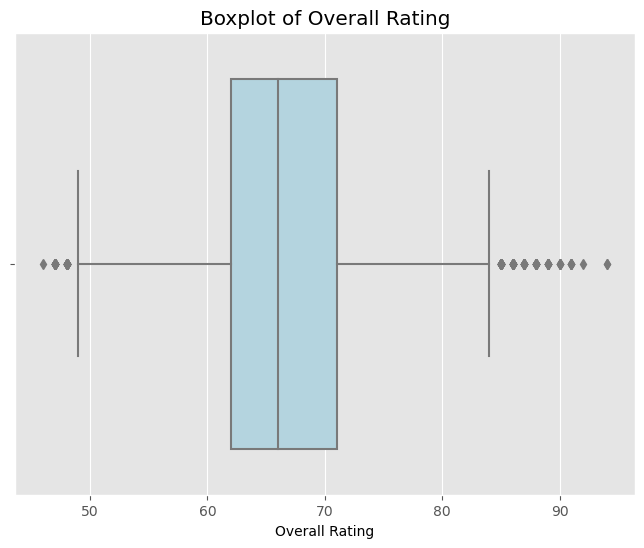

In [96]:
#spot outliers 
plt.figure(figsize=(8, 6))   
sb.boxplot(x=df['Overall'], color='lightblue')

 
plt.title('Boxplot of Overall Rating')
plt.xlabel('Overall Rating')

In [97]:
#remove outliers 

df = remove_outliers_iqr(df, 'Overall')

Text(0.5, 0, 'Potential Rating')

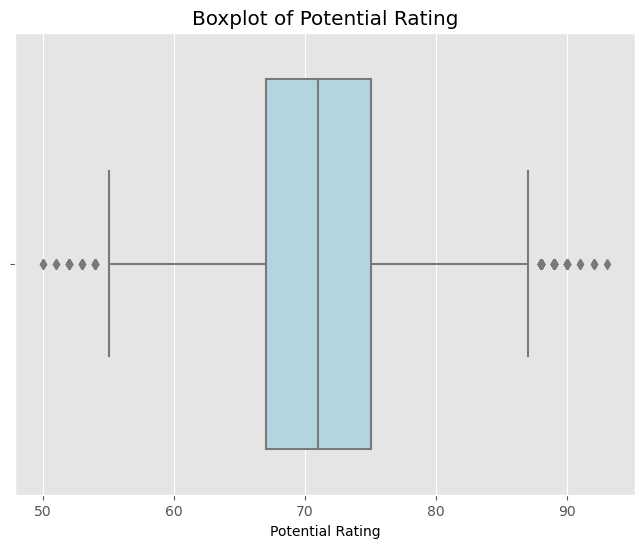

In [98]:
#same for the rest of the columns
plt.figure(figsize=(8, 6))   
sb.boxplot(x=df['Potential'], color='lightblue')

 
plt.title('Boxplot of Potential Rating')
plt.xlabel('Potential Rating')

In [99]:
#remove outliers 
df = remove_outliers_iqr(df, 'Potential')

Text(0.5, 0, 'Potential Rating')

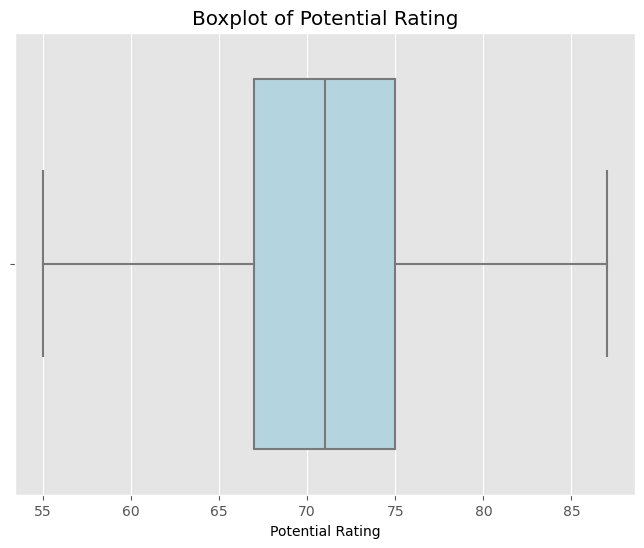

In [100]:
plt.figure(figsize=(8, 6))   
sb.boxplot(x=df['Potential'], color='lightblue')

 
plt.title('Boxplot of Potential Rating')
plt.xlabel('Potential Rating')

In [101]:
 
df = remove_outliers_iqr(df, 'Height')

In [102]:
print(df['Height'].describe())

count    17886.000000
mean        71.354710
std          2.627704
min         63.000000
25%         69.000000
50%         71.000000
75%         73.000000
max         79.000000
Name: Height, dtype: float64


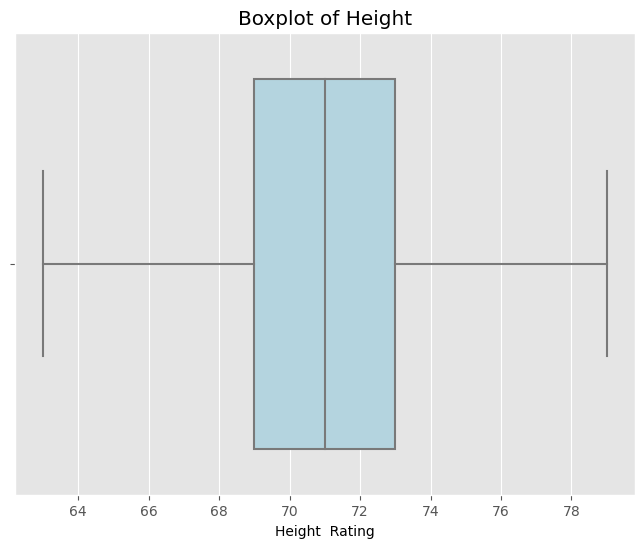

In [103]:
plt.figure(figsize=(8, 6))   
sb.boxplot(data=df,x='Height', color='lightblue')

 
plt.title('Boxplot of Height')
plt.xlabel('Height  Rating')
plt.show()

Text(0.5, 0, 'Weight   Rating')

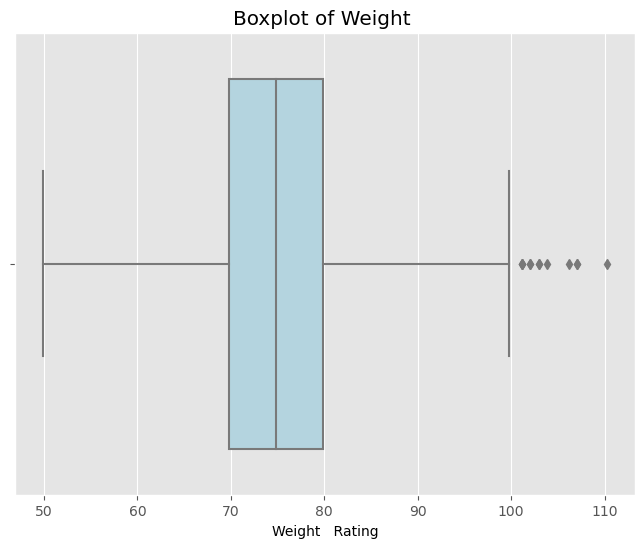

In [104]:
plt.figure(figsize=(8, 6))   
sb.boxplot(data=df,x='Weight', color='lightblue',whis=2.0)

 
plt.title('Boxplot of Weight ')
plt.xlabel('Weight   Rating')

In [105]:
#remove outlires 
df = remove_outliers_iqr(df, 'Weight')

In [106]:
#first we need to remove k,m or similer values in columns Wage and value ,for making the analyis, and remving outliers 
# we need to build function to change its data type to float
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x;
    if 'K' in x:
        if len(x) > 1:
            return float (x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float (x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        if len(x) > 1:
            return float (x.replace('B', '')) * 1000000000
        return 1000000000.0
#apply the function to the columns
wage = df["Wage"].replace('[\€,]', "", regex=True).apply(value_to_float)
value = df["Value"].replace('[\€,]', "", regex=True).apply(value_to_float)
re=df["Release Clause"].replace('[\€,]', "", regex=True).apply(value_to_float)
df["Wage"] = wage
df["Value"] = value
df['Release Clause']=re

In [107]:
#removing outlires
df = remove_outliers_iqr(df, 'Wage')
df = remove_outliers_iqr(df, 'Value') 

Text(0.5, 0, 'Value Rating')

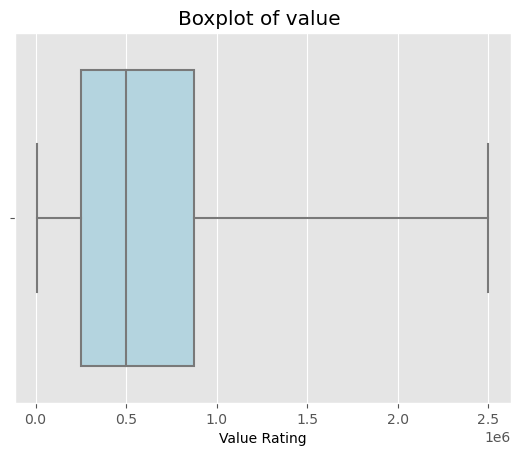

In [108]:
sb.boxplot(data=df,x='Value', color='lightblue',whis=3.0)

 
plt.title('Boxplot of value ')
plt.xlabel('Value Rating')

Text(0.5, 0, 'Wage Rating')

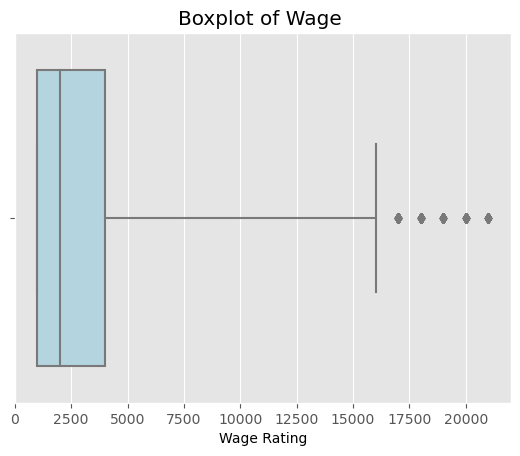

In [109]:
sb.boxplot(data=df,x='Wage', color='lightblue',whis=4.0)
plt.title('Boxplot of Wage ')
plt.xlabel('Wage Rating')

In [110]:
df = remove_outliers_iqr(df, 'SprintSpeed')


Text(0.5, 0, 'SprintSpeed Rating')

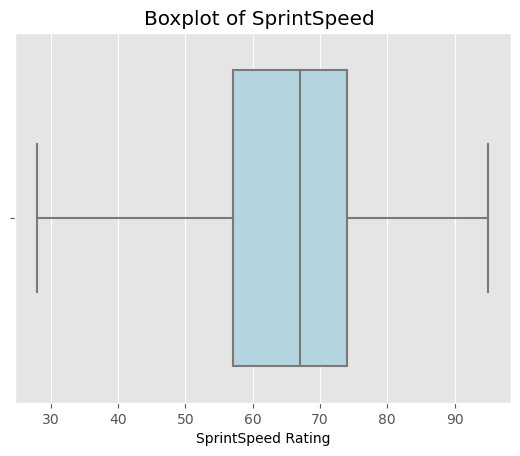

In [111]:
sb.boxplot(data=df,x='SprintSpeed', color='lightblue',whis=2.0)

 
plt.title('Boxplot of SprintSpeed ')
plt.xlabel('SprintSpeed Rating')

In [112]:
def remove_outliers_from_columns(df, columns):
    """Removes outliers from multiple columns in a DataFrame."""
    df_copy = df.copy()  # Create a copy to avoid modifying the original
    for column in columns:
        # Calculate IQR for the column
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
    return df_copy

# Columns to remove outliers from
numerical_columns = ['Defending', 'General', 'Mental', 'Passing', 
                     'Mobility', 'Power', 'Rating', 'Shooting']

# Remove outliers
players_no_outliers = remove_outliers_from_columns(players, numerical_columns)

In [113]:
#after removing outlires from the important features we can start our analysis 

In [114]:
descriptive_stats = players[['Defending', 'General', 'Mental', 'Passing', 
                            'Mobility', 'Power', 'Rating', 'Shooting', 'Age']].describe()
print(descriptive_stats)

          Defending       General        Mental       Passing      Mobility  \
count  18207.000000  18207.000000  18207.000000  18207.000000  18207.000000   
mean      46.880980     53.304114     52.914264     53.711375     63.671775   
std       20.409309     15.774096     12.474470     15.093124     11.175285   
min        5.000000      8.000000     11.000000      8.000000     24.000000   
25%       28.000000     49.000000     47.000000     46.000000     58.000000   
50%       53.000000     57.000000     55.000000     57.000000     65.000000   
75%       64.000000     63.000000     62.000000     64.000000     72.000000   
max       92.000000     89.000000     85.000000     92.000000     94.000000   

              Power        Rating      Shooting           Age  
count  18207.000000  18207.000000  18207.000000  18207.000000  
mean      64.400121     68.773219     47.073488     25.122206  
std        8.680280      5.951240     16.363819      4.669943  
min       25.000000     48.00000

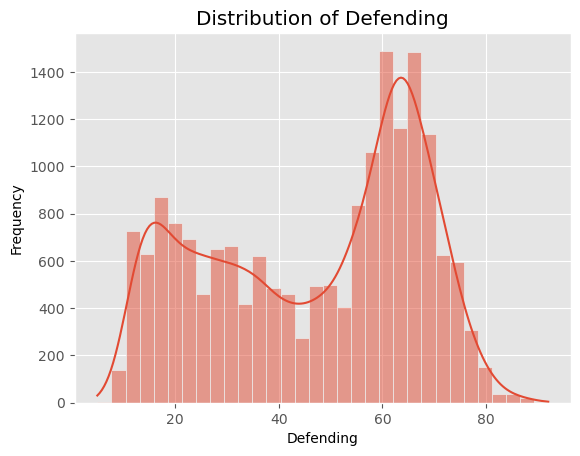

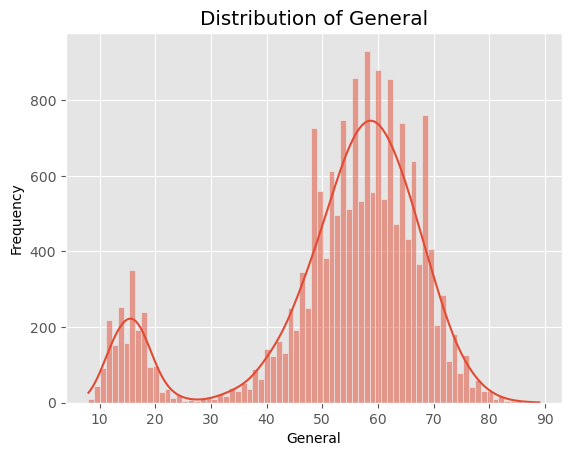

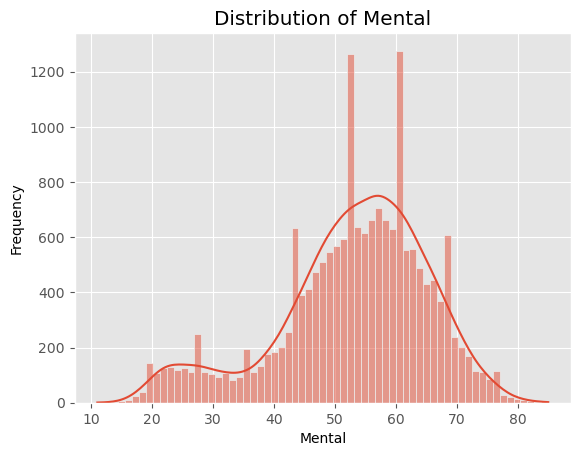

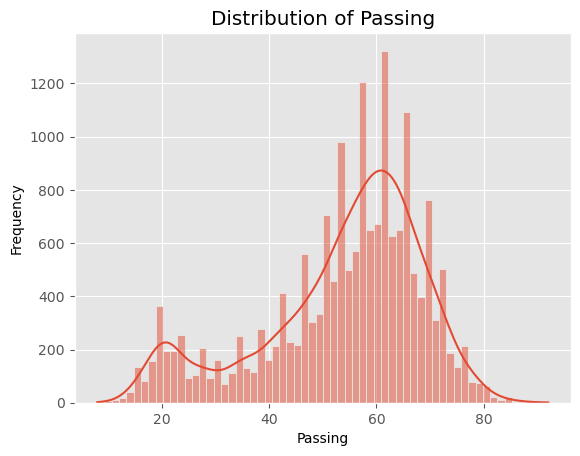

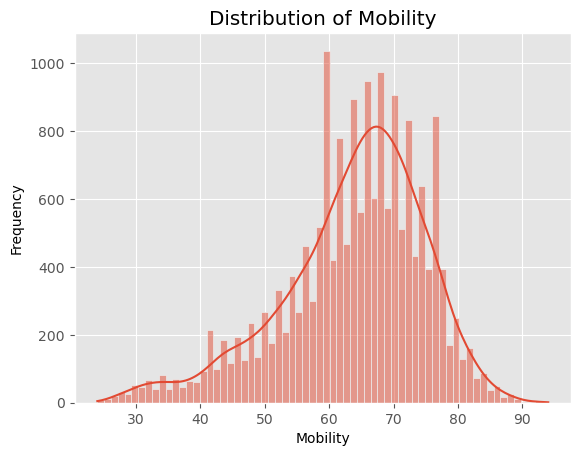

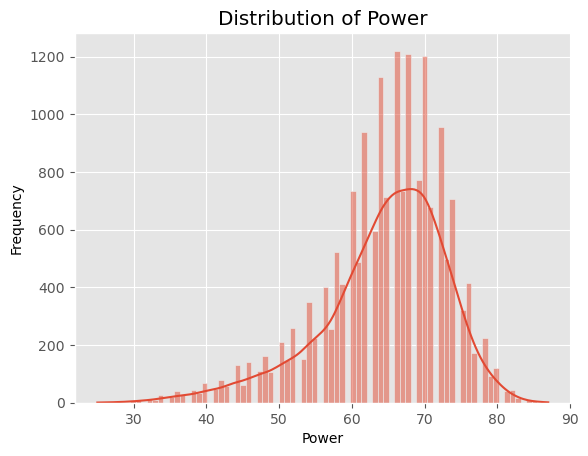

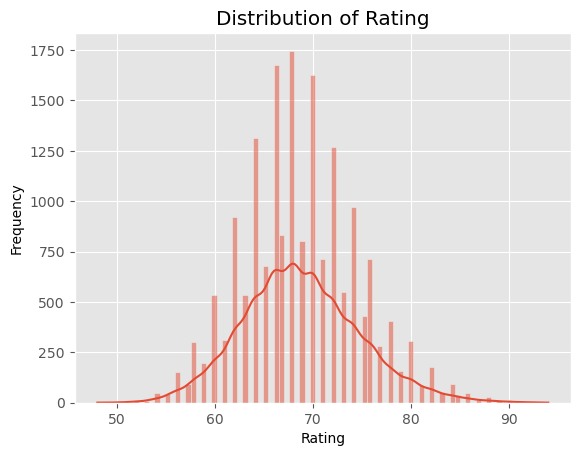

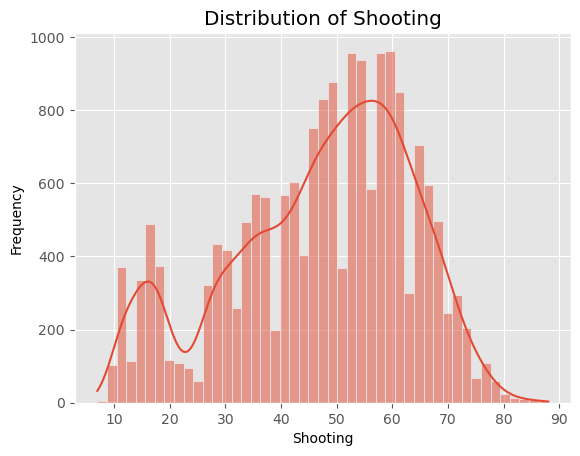

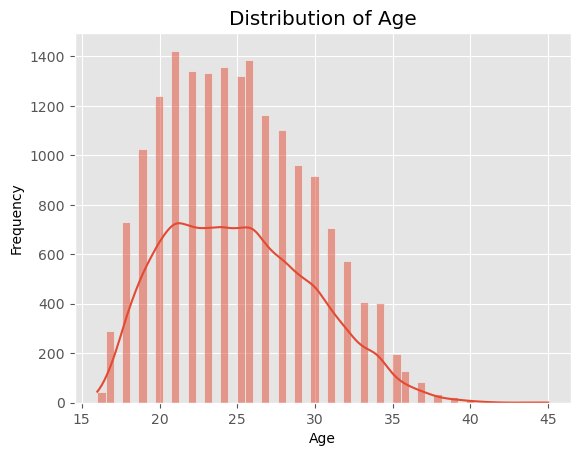

In [115]:
#visualize the distribution of numerical
for column in ['Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power', 'Rating', 'Shooting', 'Age']:
    plt.figure()  # Create a new figure for each plot
    sb.histplot(players[column], kde=True)   
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

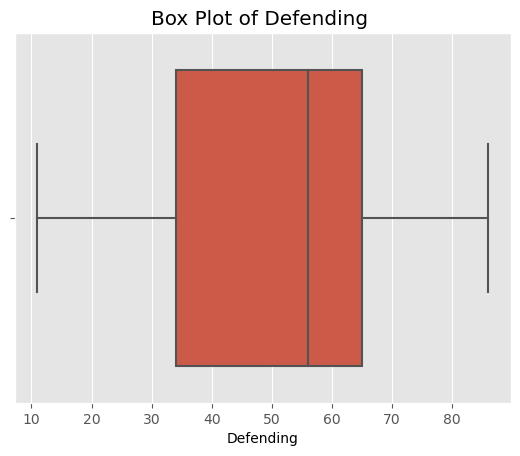

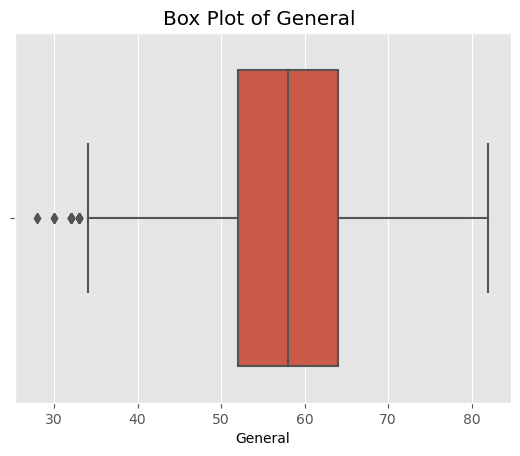

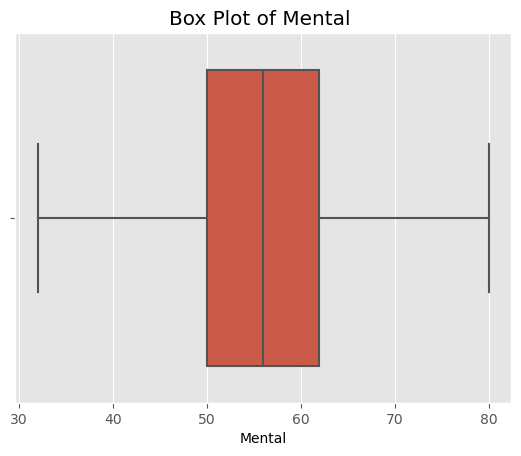

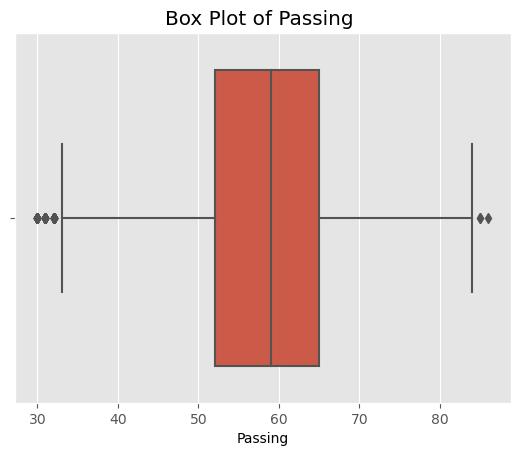

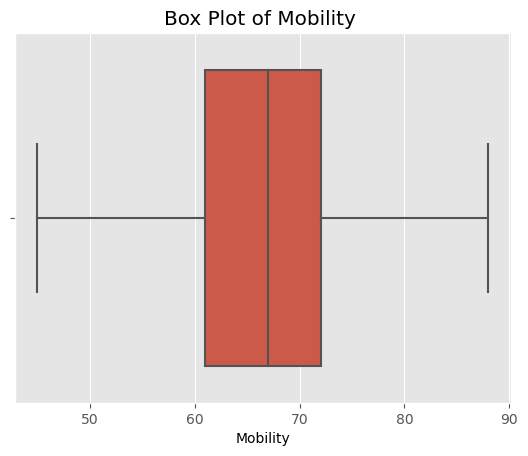

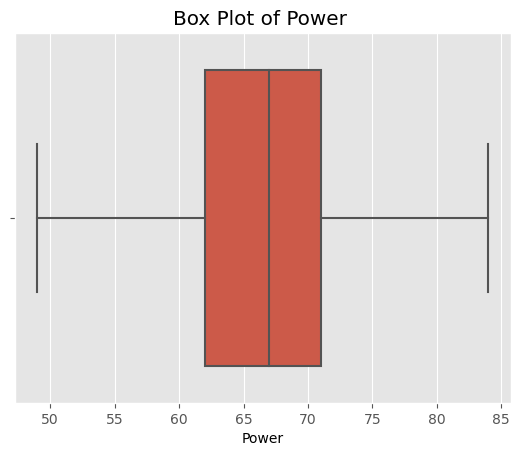

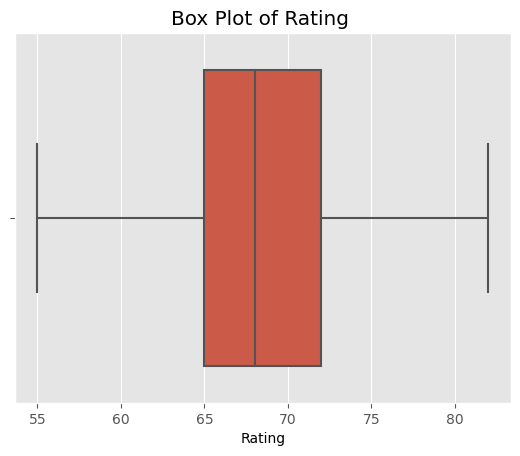

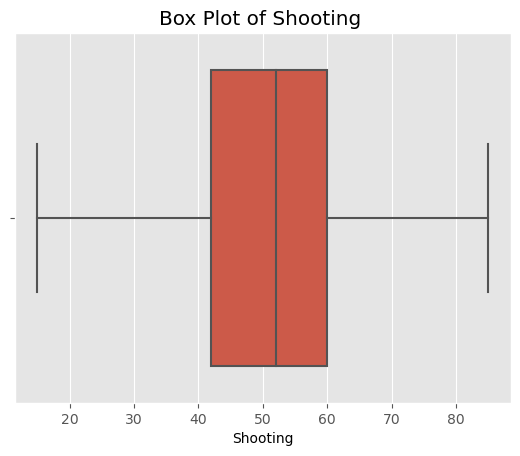

In [116]:
#boxplot to verify the step of removing outlires
for column in numerical_columns:
    plt.figure()   
    sb.boxplot(data=players_no_outliers, x=column)
    plt.title(f'Box Plot of {column} ')
    plt.xlabel(column)
    plt.show()

In [117]:
count = df["Nationality"].value_counts()
print(count)
players_country = count.idxmax()
num_players = count.max()
print("The country with the most number of players is", players_country, "with", num_players, "players.")


England          1371
Germany           943
Spain             668
France            617
Argentina         605
                 ... 
Mauritius           1
Kuwait              1
New Caledonia       1
Fiji                1
Botswana            1
Name: Nationality, Length: 161, dtype: int64
The country with the most number of players is England with 1371 players.


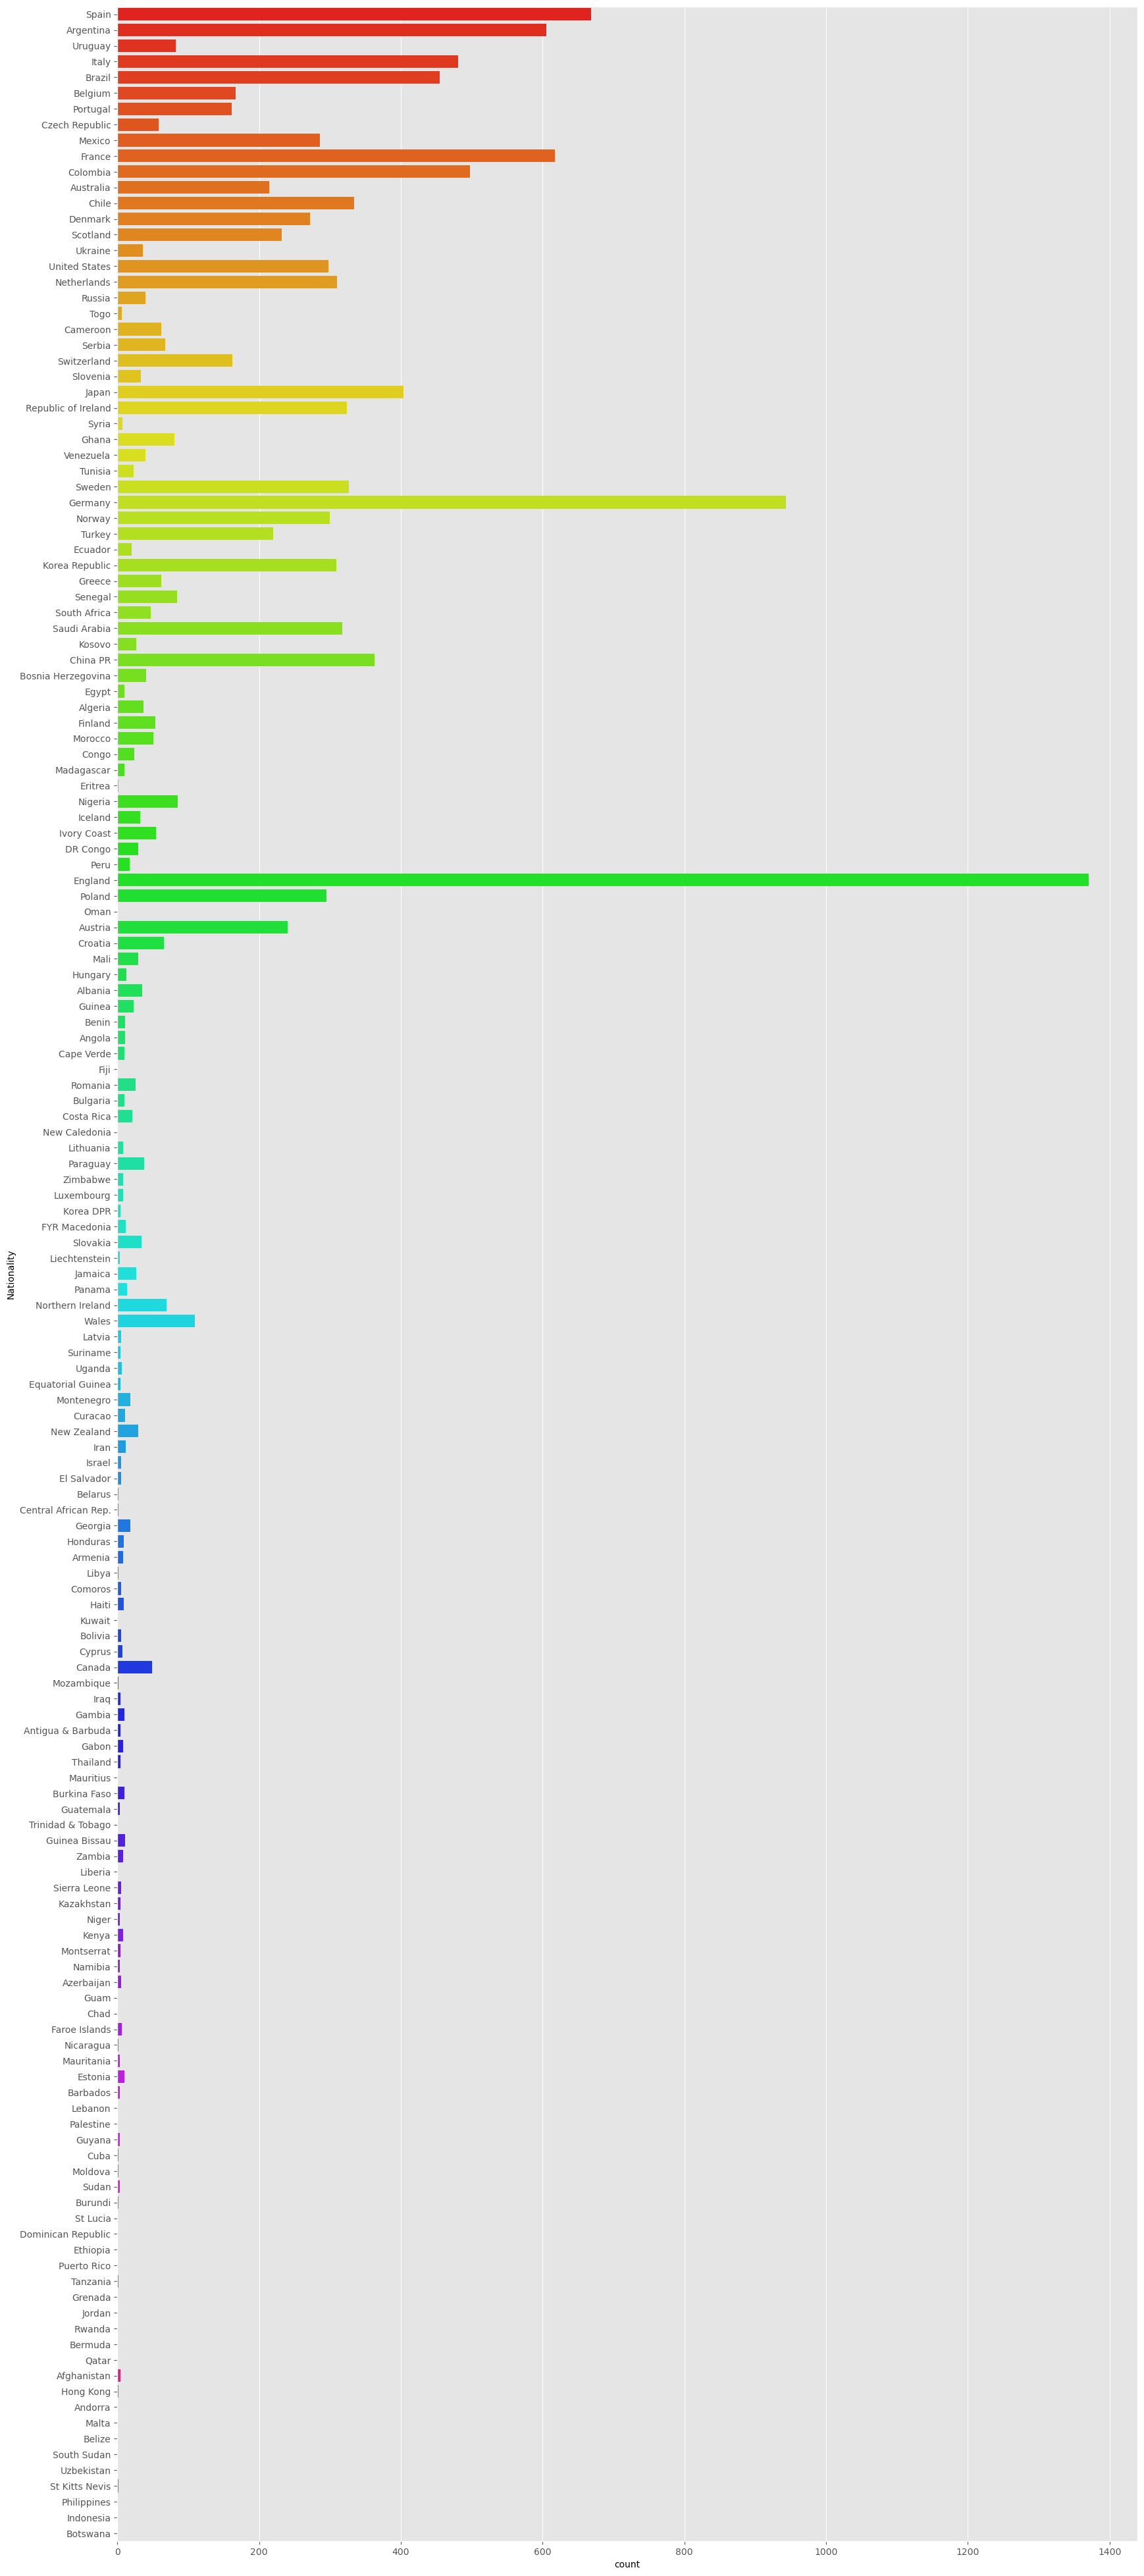

In [118]:
plt.figure(figsize=(20,50))
sb.countplot(y="Nationality",data=df,palette="hsv")
plt.show()
#We can see that the most common nationality is England

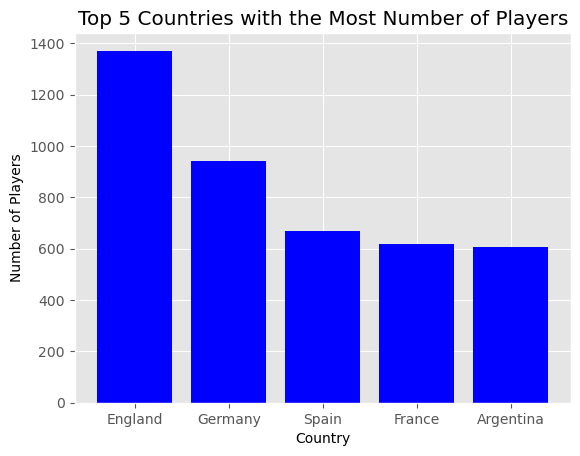

<Figure size 1200x600 with 0 Axes>

In [119]:
l=count.head()
plt.bar(l.index,l.values,color="blue")
plt.title('Top 5 Countries with the Most Number of Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.figure(figsize=(12,6))
plt.show()

In [120]:
#locate the player with hightest salary
salary=df.loc[df['Wage'].idxmax()]
print(salary)
s=salary["Wage"]
print(" highest salary is",s)

ID                     230437
Name           Elias Fontoira
Age                        34
Nationality            Brazil
Overall                    74
                    ...      
Passing                    72
Mobility                   70
Power                      71
Rating                     74
Shooting                   70
Name: 2143, Length: 63, dtype: object
 highest salary is 21000.0


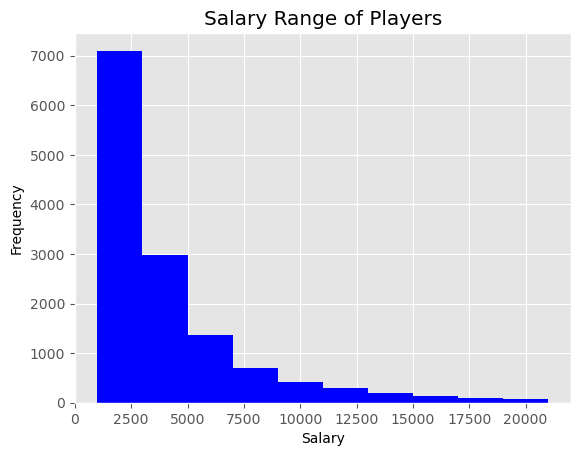

In [121]:
plt.hist(df['Wage'], color='blue')
plt.title('Salary Range of Players')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [122]:
df['Height'] = df['Height'].astype(float)
tallest = df.loc[df['Height'].idxmax()]
print(tallest)
player_height = tallest['Height']
print("Height of the tallest player:",player_height)
 

ID                  227537
Name            H. Veerman
Age                     27
Nationality    Netherlands
Overall                 70
                  ...     
Passing                 42
Mobility                60
Power                   64
Rating                  70
Shooting                60
Name: 5491, Length: 63, dtype: object
Height of the tallest player: 79.0


In [123]:
foot=df["Preferred Foot"].value_counts()
print(foot)

Right    10274
Left      3096
Name: Preferred Foot, dtype: int64


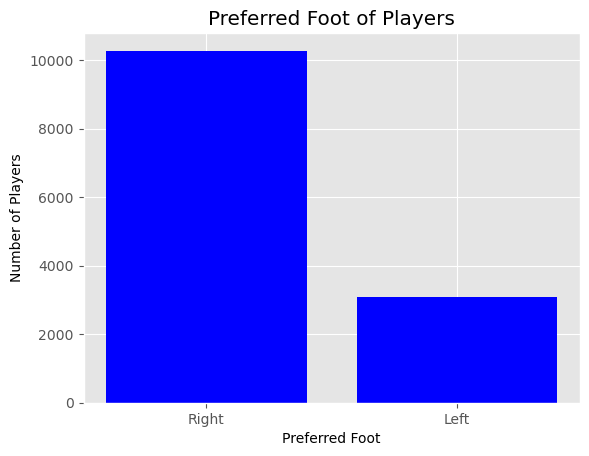

In [124]:
#each foot preference using the value_counts() function, right foot is most preferred
plt.bar(foot.index,foot.values,color="blue")
plt.title('Preferred Foot of Players')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.show()

In [125]:
#count the number of players for each club using the value_counts() function,
#then print the first 30 rows these club have most no of players . 
no_player=df["Club"].value_counts()
no_player.head(100)

Al Hazem               30
Ipswich Town           29
Ascoli                 29
AS Nancy Lorraine      29
Cittadella             29
                       ..
FC Wacker Innsbruck    27
CD Lugo                27
Exeter City            27
Itagüí Leones FC       27
Holstein Kiel          27
Name: Club, Length: 100, dtype: int64

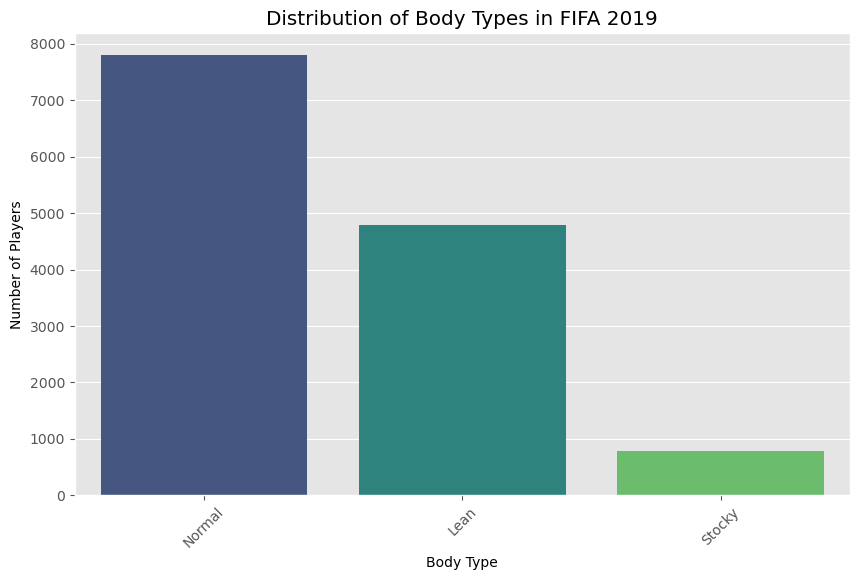

In [126]:
body_type_counts = df['Body Type'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sb.barplot(x=body_type_counts.index, y=body_type_counts.values, palette="viridis")
plt.title('Distribution of Body Types in FIFA 2019')
plt.xlabel('Body Type')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()
#conclusion :most frequnt body type is normal

In [127]:
#different work rate of players
df['Work Rate'].value_counts()

Medium/ Medium    7704
High/ Medium      2092
Medium/ High      1166
Medium/ Low        609
High/ High         575
High/ Low          481
Low/ Medium        360
Low/ High          354
Low/ Low            29
Name: Work Rate, dtype: int64

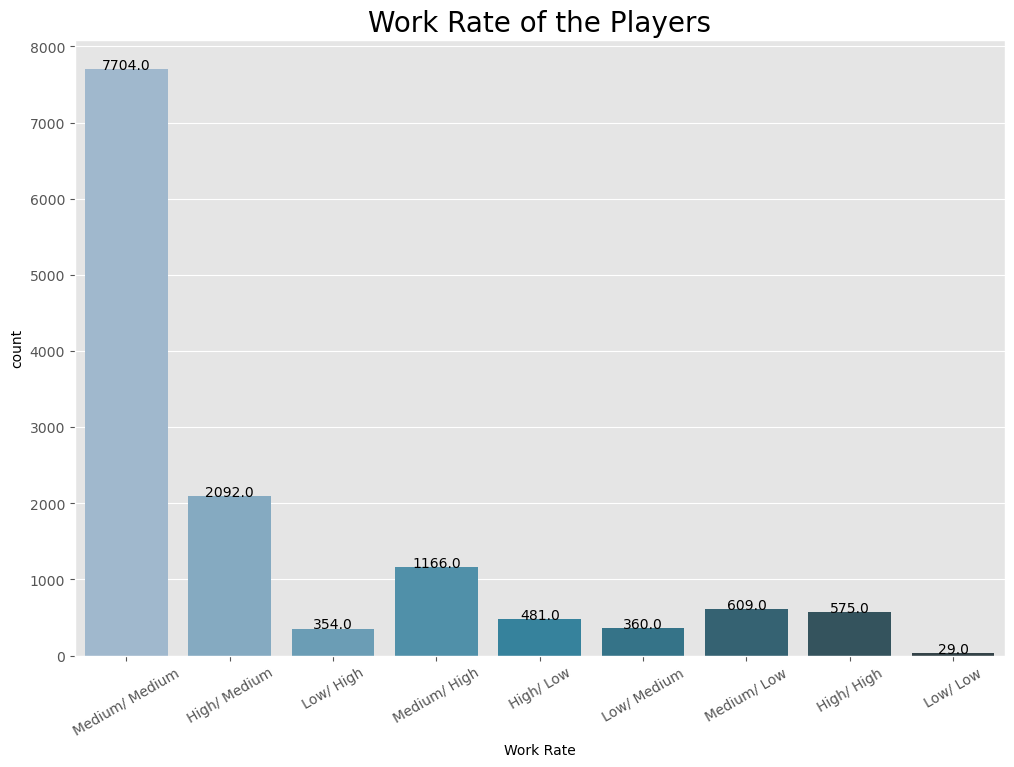

In [128]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sb.countplot(ax=ax,x=df['Work Rate'], data=df, palette = 'PuBuGn_d')
graph.set_title('Work Rate of the Players', fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

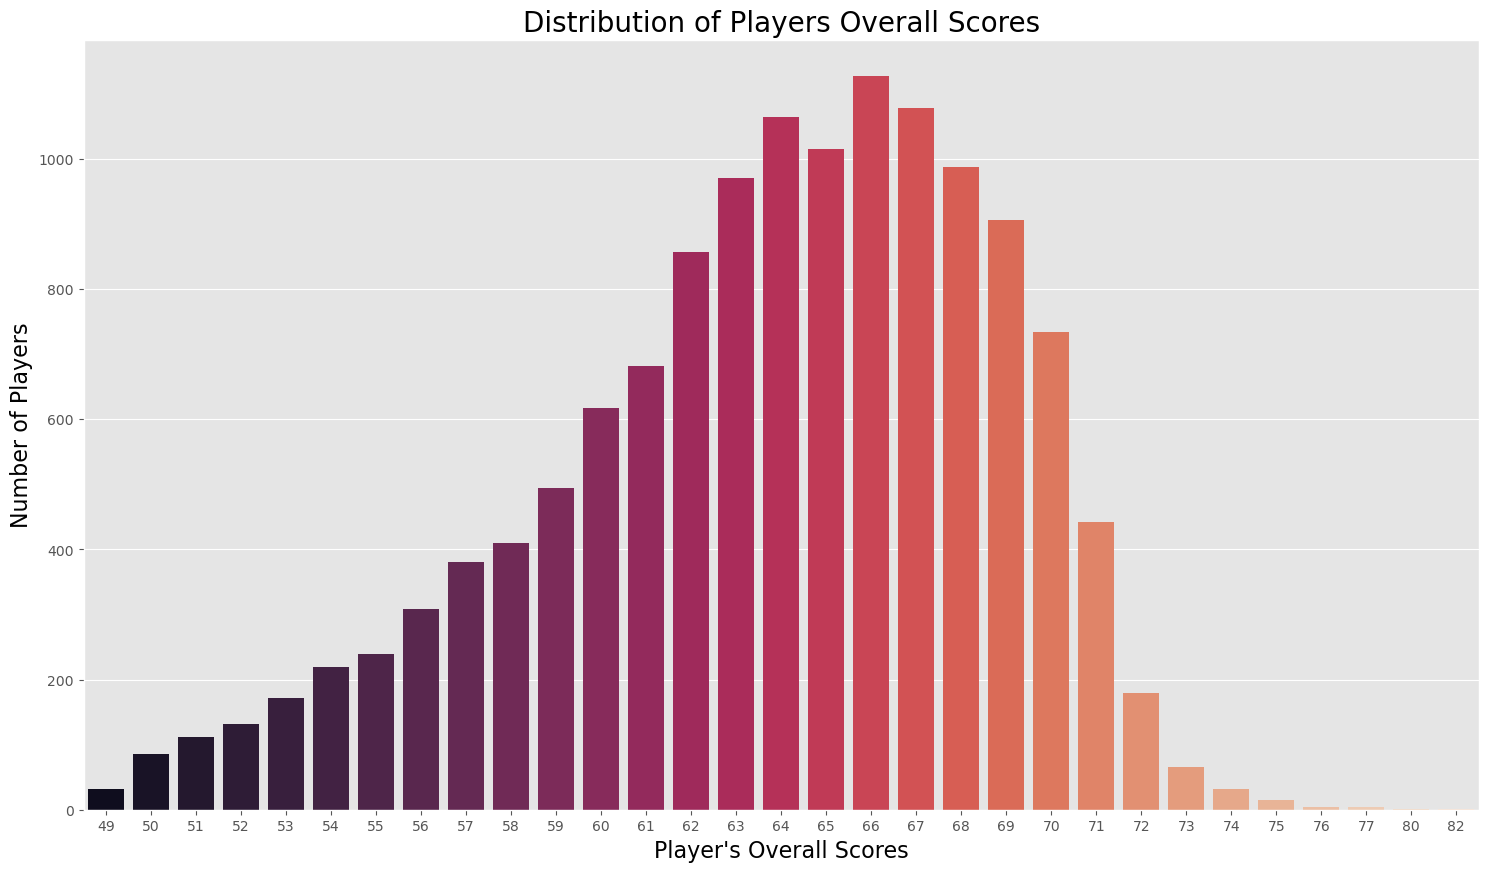

In [129]:
#visualize the overall score of players 
x = df['Overall']
plt.figure(figsize=(18,10))
ax = sb.countplot(x=x, palette='rocket')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Distribution of Players Overall Scores', fontsize = 20)
plt.show()

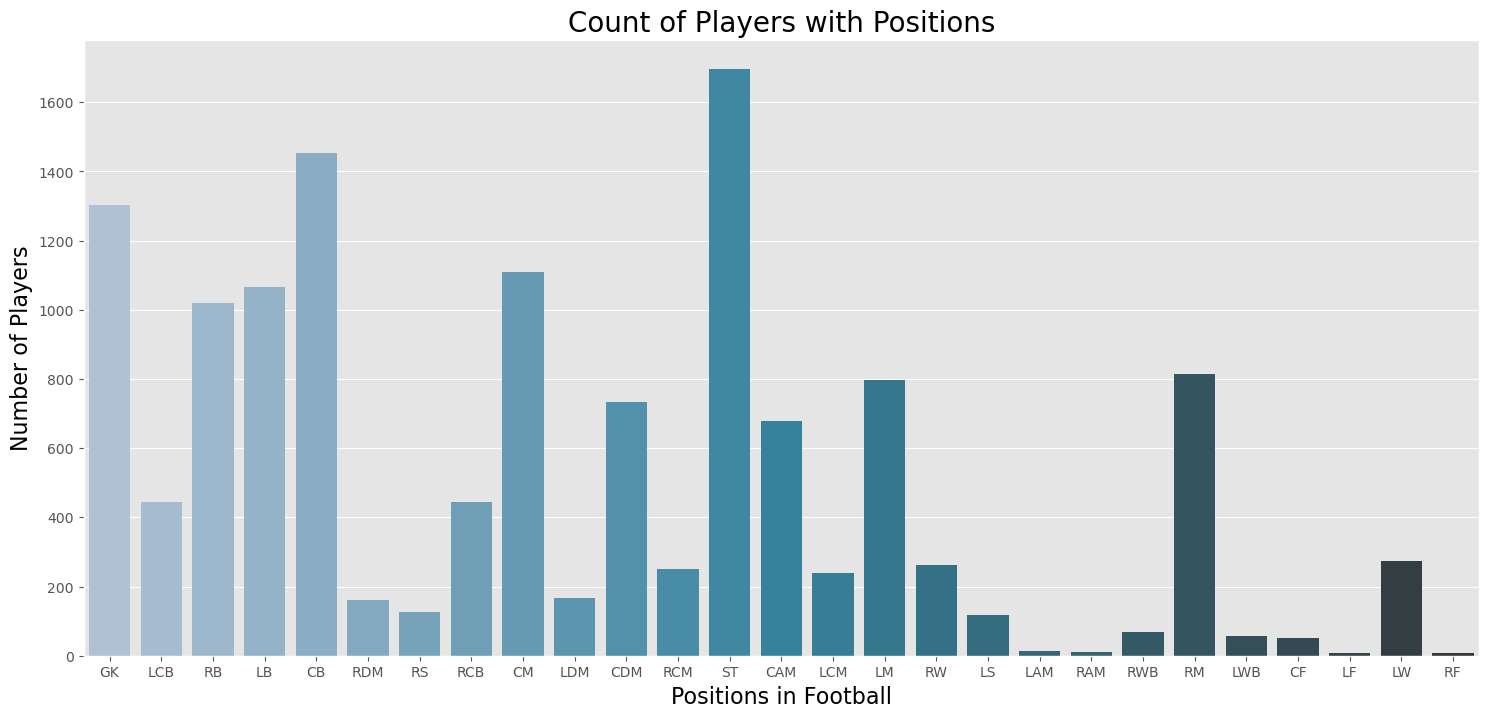

In [130]:
# different positions acquired by the players 
plt.figure(figsize = (18, 8))
ax = sb.countplot(x='Position', data = df, palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Count of Players with Positions', fontsize = 20)   
plt.show()

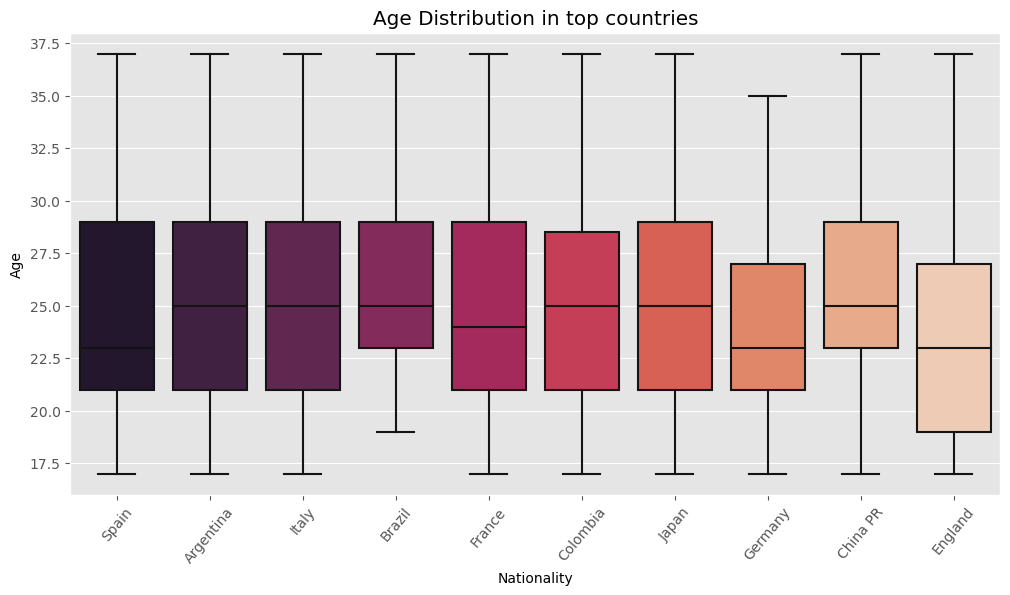

In [131]:
top_countries = df['Nationality'].value_counts().head(10)
top_countries_name = top_countries.index
df_country_age = df.loc[df['Nationality'].isin(top_countries_name) & df['Age']]
plt.figure(1 , figsize = (12,6))
sb.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age, palette='rocket')
plt.title('Age Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()
#we can see that Geramany is the least range of ages

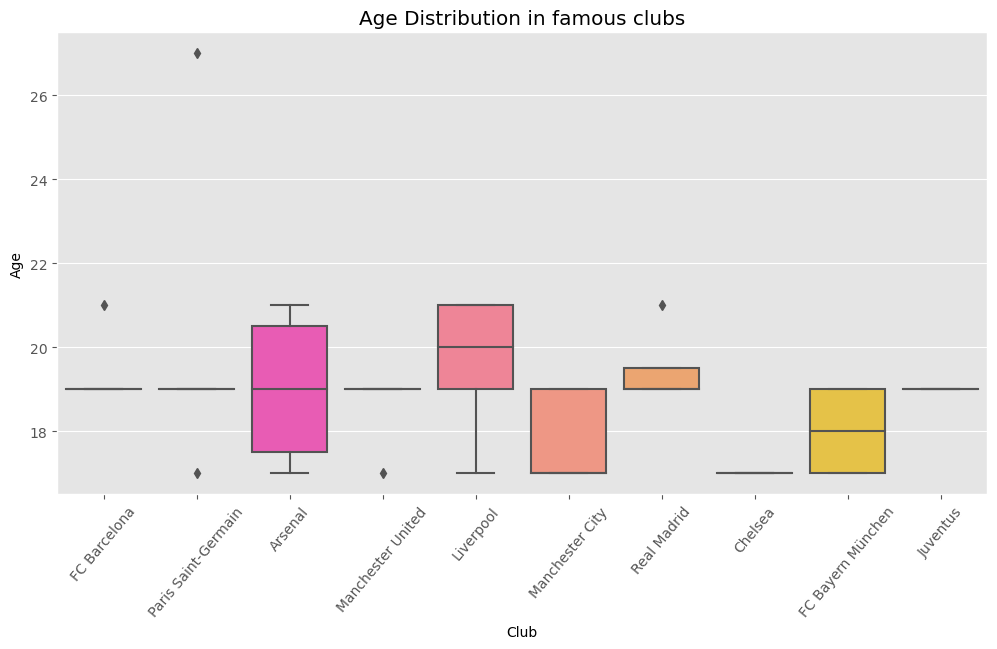

In [132]:
#some famous clubs (from my prespective)
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester City']
#Age distribution in famous clubs
df_club_age = df.loc[players['Club'].isin(clubs) & df['Age']]
plt.figure(1 , figsize = (12,6))
sb.boxplot(x = 'Club', y = 'Age' , data = df_club_age, palette='spring')
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()
#observation: Overall, the age distribution of players across the clubs is relatively similar. The median age for most clubs falls between 20 and 22, with a few outliers.
#There is some variation in the spread of ages within each club. Some clubs have a wider range of player ages, while others have a more concentrated group of players around the median age.
#Real Madrid and Chelsea have the lowest median ages among the clubs. This suggests that these teams may have a younger squad on average compared to the others.

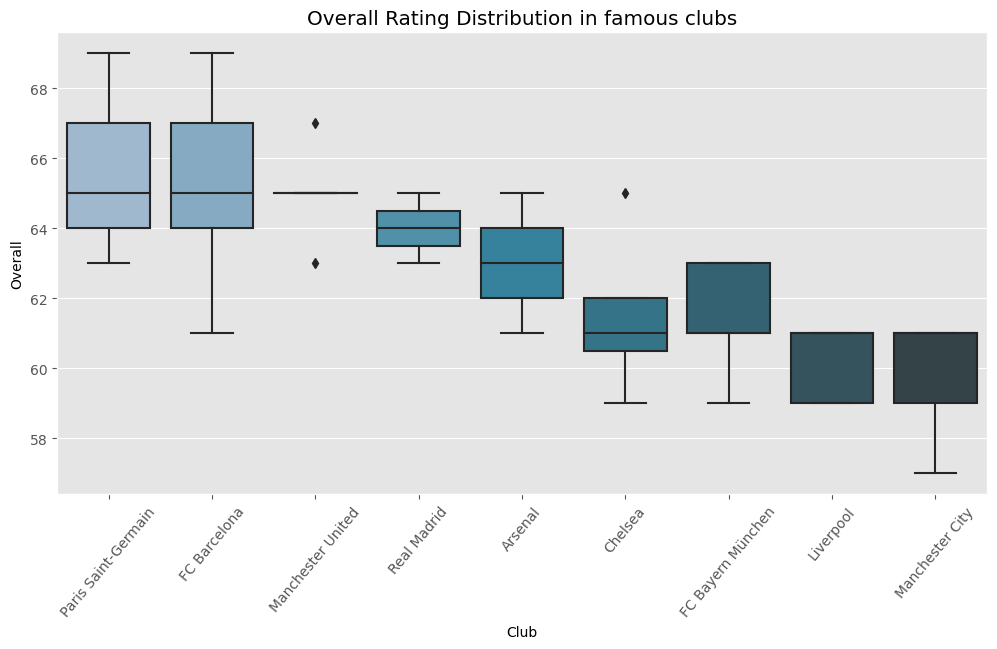

In [133]:
#overall rating
df_club_rating = df.loc[df['Club'].isin(clubs) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sb.boxplot(x = 'Club' , y = 'Overall' , data = df_club_rating, palette='PuBuGn_d')
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()
#Paris Saint-Germain and FC Barcelona have the highest median ratings, suggesting they have a generally higher-rated squad

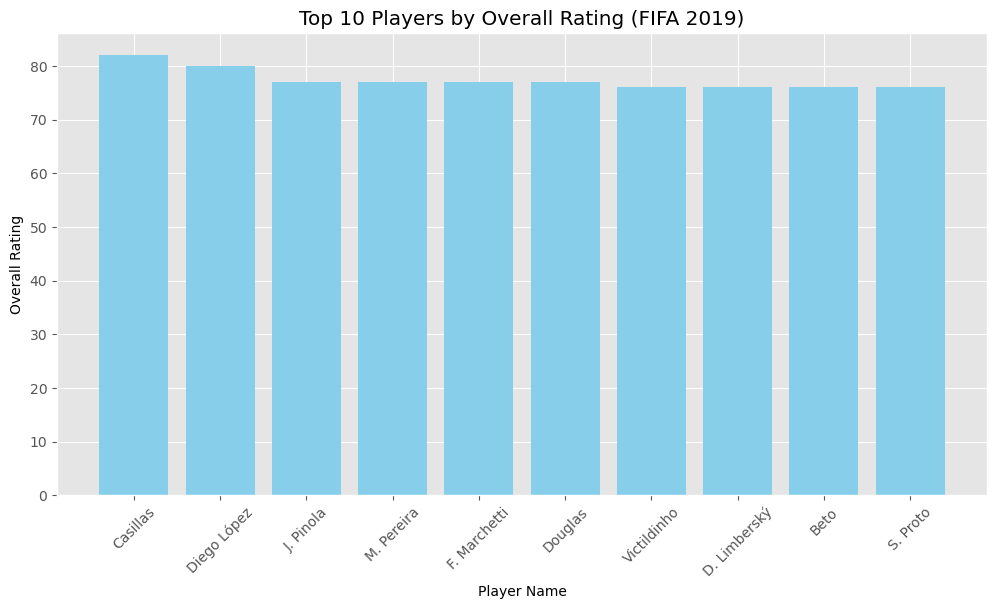

In [134]:
df_sorted = df.sort_values(by='Overall', ascending=False)

# Get the top 10 players
top_10_players = df_sorted.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_players['Name'], top_10_players['Overall'], color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Overall Rating')
plt.title('Top 10 Players by Overall Rating (FIFA 2019)')
plt.xticks(rotation=45)
plt.show()
#we can see the Casillas is the highest overall score

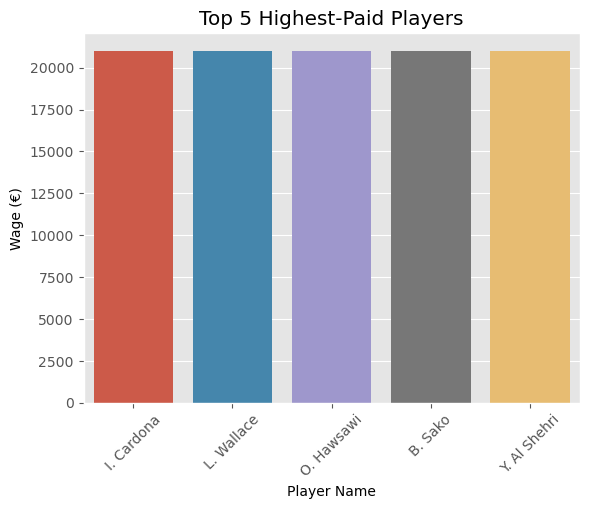

In [135]:
#highest Earners
df2 = df.sort_values(by='Wage', ascending=False)[['Name', 'Club', 'Nationality', 'Overall', 'Age', 'Wage']].head(5)

 
sb.barplot(x='Name', y='Wage', data=df2)

# Add plot labels and title
plt.xlabel('Player Name')
plt.ylabel('Wage (€)')
plt.title('Top 5 Highest-Paid Players')

 
plt.xticks(rotation=45)

 
plt.show()
#we can notice they all are equal 

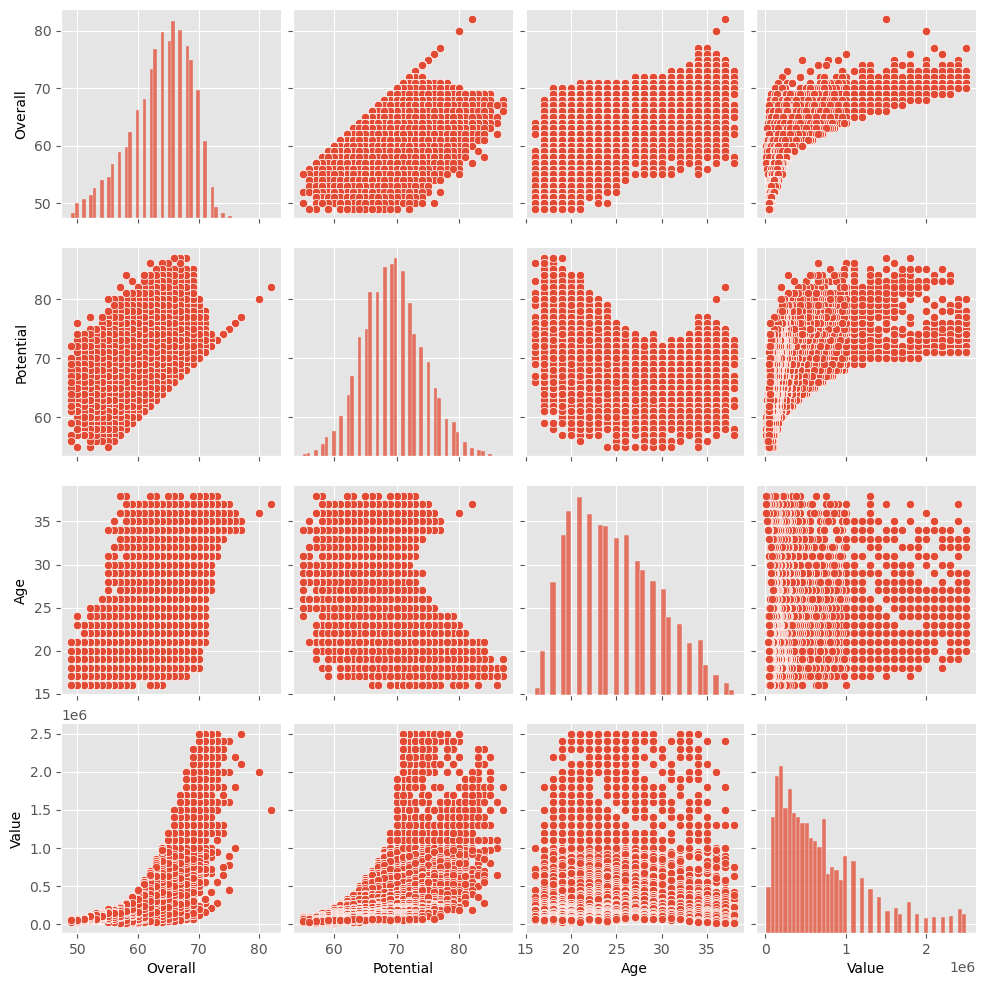

In [136]:
 
sb.pairplot(df[['Overall', 'Potential', 'Age', 'Value']])
plt.show()
#obervation:
#Overall vs. Potential: There's a strong positive correlation between Overall and Potential, as expected. Players with higher overall ratings generally have greater potential for growt
#Potential vs. Age: There seems to be a slight negative correlation between Potential and Age, suggesting that younger players generally have higher potential for growth.


In [137]:
#check for duplicated values
df.duplicated().sum()
#no duplicated values to handle

0

In [138]:
df['Joined'].head()

318     Jul 12, 2015
544      Jul 1, 2017
913     Jun 27, 2017
990     Jul 15, 2015
1071     Jul 2, 2018
Name: Joined, dtype: object

In [139]:
#one-hot encoding 
categorical_columns = ['Name', 'Nationality', 'Club', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Position', 'Joined', 'Contract Valid Until']
df_encoded = pd.get_dummies(df, columns=categorical_columns)


In [140]:
from sklearn.model_selection import train_test_split
#splitting data
# Select features (X) and target variable (y) - Market Value
X = df_encoded.drop('Value', axis=1) 
y = df_encoded['Value']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Defending', 'General', 'Mental', 'Passing',
       'Mobility', 'Power', 'Rating', 'Shooting'],
      dtype='object')


In [145]:
from sklearn.preprocessing import StandardScaler


#feature scaling
scaler = StandardScaler()
numerical_cols = ['ID', 'Age', 'Overall', 'Potential', 'Wage',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Defending', 'General', 'Mental', 'Passing',
       'Mobility', 'Power', 'Rating', 'Shooting']

# Fit the scaler on the training data and transform both training and testing data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
